In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#data loading
data = pd.read_csv('TestData.csv',sep=',')

In [3]:
#enlever les colonnes U0.......U20
data=data.iloc[0:,19:]

In [4]:
#verifier si les données sont valide
#data.isnull().sum()
len(data)

1559

In [5]:
#permet de rapprocher les valeurs un peu près comme normalisation
#label_Classe= LabelEncoder() 
#data['Classe']=label_Classe.fit_transform(data['Classe'])#utile pour normaliser les valeurs des classes

In [6]:
# data.tail(10)

In [7]:
# #permet de compter le nombre de répetition de chaque classe
# data['Classe'].value_counts()

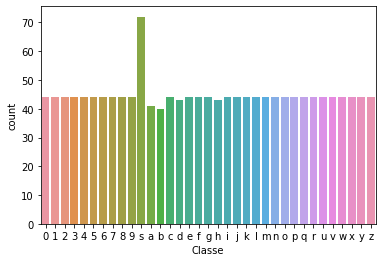

In [8]:
sns.countplot(data['Classe'])

In [9]:
X =data.drop('Classe',axis=1)  # dans x on garde toutes les colonnes sauf la classe
Y =data['Classe'] # dans y on garde la classe

In [10]:
#on divisie notre dataSet en 2 parties une pour l'entrainement et une pour le test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=42)

In [11]:
# X_test
# Y_test


<!-- 
## Random Forest Classifier
Définition : est une technique d'apprentissage automatique, elle se base sur une forêt d'arbre de décision
chaque arbre de décision fournit ça propre décision , ainsi un vote est fait et la décision qu'à le plus de vote est élu comme décision final de l'arbre.

### Avantages
- ils sont utilsé dans la classification et la régression
- gére et maintient la précision pour les données manquants
- quand le nombre d'arbres est plus grand que le nombres de donnée  dans le dataSet il est garanti  qu'il n y aura pas de sur-apprentissage a cause du system de bagging et sous-espaces aléatoires 
- gére des grand dataset avec de grandes dimension

### Inconvénients
- malgré qu'ils sont utile pour la classification , ils le sont moins que pour la régression du faite qu'il nous donne pas des valeurs pour savoir a quel pourcentage un element est de classe A ou B , en effet il répond il est de classe A ou de classe B , mais on ne sais pas a quel point.
- on a pas de controle sur ce que fait le modèle

### Application
- le secteur des banques , dans l'évaluation des risque
- les gains/pertes dans le domaine de la bourse
- ....

### mots clés 

- Bagging : est un meta algorithm d'ensemble , qui augmente la stabilité et réduit la variance, les données sont piochées aléatoirement et mis dans des sous ensemble, a chaque entrainement le modèle utilise un sous ensemble totalement différent pour éviter le sur-apprentissage 

## Exemple -->

In [19]:
#ici on a choisi juste 6 arbres étant donné que la taille de notre data set n'est pas grande
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)

In [16]:
# print(pred_rfc)

<!-- # analyse du rapport de la classification :
     - on peut voir la précision du model, après avoir été entrainé sur notre DataSet
     - on peut aussi voir la précision de classification de chaque classe comparé aux autres par exemple les classe de 3 a 9 sont a 100% détéctées contrairement 0 1 et 2 que le modèle les confends avec un taux pas très élever .
     - on peut aussi voir les rappels de chaque classe c'est a dire quel proportion de résultats positif réels a été identifié correctement. -->

In [20]:

print(classification_report(Y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.90      1.00      0.95         9
           2       0.92      1.00      0.96        12
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00         3
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        13
           a       0.91      0.91      0.91        11
           b       1.00      0.82      0.90        11
           c       1.00      0.88      0.93        16
           d       1.00      0.82      0.90        11
           e       0.88      1.00      0.93         7
           f       0.94      1.00      0.97        15
           g       1.00      1.00      1.00        13
           h       0.93    

<!-- # analyse de la matrice de confusion -->

In [21]:
print(confusion_matrix(Y_test,pred_rfc ))

[[ 8  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 13]]


<!-- la matrice de confusion permet d'analyser la qualité d'un système de classification, comme son nom l'indique elle determine le niveau de confusion entre classe
les lignes c'est l'entré et les colonnes c'est le résultat de la classification par exemple :
- (0,0) => trois 0 ont été classé comme des 0 (Vrai positif)
- (0,X) => il y a jamais eu de confusion de la classe 0 avec d'autres caractère (Vrai Négatif)
- (X,0) => il y a eu un 8 et un 6 , réels qui ont été confondu avec 0 (Faux positifs)
ainsi plus la matrice est proche d'une matrice diagonale plus le système de classification est bon. -->

<!-- 
## Support Vector Machine
### Définition :
les machines à vecteurs de support  sont des techniques d'apprentissage supervisé utilisé pour résoudre des problèmes de classification et de regressions, ils ont été développés dans les années 90 à partir des reflexions de Vladimir Vapnik ,
ils ont été rapidement implémenté pour leur capacité à s'adapter avec des données de grandes dimensions et pour leur résultats fiables. il parait que les performances des SVM est d'ordre au moins égales a celui des réseaux de neurones, leurs principes est simple il se base sur une marge maximale pour séparrer les différentes classes, ainsi il offre une soupplesse permettant de mieux classifier.
![title](svm.png)


la marge maximale est la procédure qui cherche un hyperplan séparateur entre les classes,ça se fait par le biais d'une discrimination linéare ce qui limite les problèmes qu'on peut résoudre avec les svm, ainsi pour remédier au problème de l'abscence d'un séparateur linéaire l'idée est de reconsidérer le problème dans un espace de dimension supérieure, éventuellement infinie, dans cet espace il est fort probable qu'il existe une séparation linéaire.
![title](svmNonLinear.png) -->

<!-- ### les avantages
- Sa grande précision de prédiction 
- Fonctionne bien sur de plus petits data sets 
- Ils peuvent être plus efficace car ils utilisent un sous-ensemble de points d’entraînement.

### Les inconvénients
- Ne convient pas à des jeux de données plus volumineux, car le temps d’entraînement avec les SVM peut être long
- Moins efficace sur les jeux de données contenant du bruits et beaucoup d’outliers

### Les applications
 - la détection de visages , les svm classifies les parties appartenantes au visage  et non appartenante jusqu'à définir un contour au tour du visage.
 - classifications des images 
 - BioInformatique , classification du cancer , proteines et les gènes des patiens sur la base de g-nes et d'autres problèmes biologiques.
 - text et Hypertexte, il utilies les données de formations pour classer les documents en différentes catégories.
 - reconnaissance de l'écriture manuscrite, pour reconnaître les caractères manuscrits largement utilisés. -->

In [16]:
#instanciation d'un classifier de type svm
clf=svm.SVC()
clf.fit(X_train,Y_train) #entrainement
pred_clf = clf.predict(X_test)#prediction
# pred_clf#affichage des résultats

In [17]:
print(classification_report(Y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9
           4       0.50      1.00      0.67         3
           5       0.80      1.00      0.89        12
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        13
           a       0.73      0.73      0.73        11
           b       1.00      0.64      0.78        11
           c       0.93      0.81      0.87        16
           d       0.73      0.73      0.73        11
           e       0.64      1.00      0.78         7
           f       1.00      1.00      1.00        15
           g       1.00      0.92      0.96        13
           h       0.93    

In [18]:
print(confusion_matrix(Y_test,pred_clf ))

[[ 8  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 13]]


In [19]:
# ## Neural Networks

In [20]:
mlpc=MLPClassifier(hidden_layer_sizes=(52,52,52,52),max_iter=300)
mlpc.fit(X_train,Y_train)
pred_mlpc=mlpc.predict(X_test)

In [21]:
print(classification_report(Y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        12
           3       0.89      0.89      0.89         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        12
           6       1.00      0.90      0.95        10
           7       0.93      0.88      0.90        16
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        13
           a       0.71      0.91      0.80        11
           b       0.77      0.91      0.83        11
           c       0.82      0.88      0.85        16
           d       0.89      0.73      0.80        11
           e       1.00      0.86      0.92         7
           f       0.88      1.00      0.94        15
           g       1.00      0.92      0.96        13
           h       1.00    

In [22]:
print(confusion_matrix(Y_test,pred_mlpc))

[[ 8  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  2 11]]


In [23]:
#test sur la courbe de dessin d'un coeur
Xnew = [[-0.212148,-0.267778,-0.29948,-0.318689,-0.298137,-0.391123,-0.39166,-0.332926,-0.196772,-0.226409,-0.195603,-0.202815,-0.197956,-0.208973,-0.104984,0.102056,0.0200263,-0.0977367,-0.170617,-0.201229,-0.185005,0.0131545,0.0665064,0.107744,0.0964449,0.118824,0.0557161,-0.156992,-0.196657,-0.36906,-0.436593,-0.455107,-0.44989,-0.452929,-0.28455,-0.350204,-0.201105,-0.00209173,-0.00731671,0.0740171,-0.143884,-0.125816]]
predictionSVM = clf.predict(Xnew)
predictionRandomForest = rfc.predict(Xnew)
predictionNNetwork = mlpc.predict(Xnew)
print("resultat des supports vector machine est {0}".format( predictionSVM))
print("resultat des random Forest est {0}".format( predictionRandomForest))
print("resultat des réseaux de neurone est {0}".format( predictionNNetwork))

resultat des supports vector machine est ['v']
resultat des random Forest est ['0']
resultat des réseaux de neurone est ['d']


In [24]:
#test sur la courbe de dessin qui veut rien dire
Xnimp = [[-0.0294851,-0.064682,-0.273215,-0.595678,-0.220103,0.378522,-0.400078,-0.35578,-0.040492,0.616864,0.616197,0.661188,0.449561,0.416236,0.58469,0.660481,0.200372,0.204854,0.182162,0.196112,0.183642,0.205821,0.276499,0.573018,0.368421,0.147905,-0.227499,-0.257756,-0.146887,-0.119801,-0.131482,-0.0680083,-0.232264,0.169472,-0.273578,-0.235035,-0.337031,-0.309138,-0.506114,-0.000494707,0.161768,0.108695]]
predictionSVM = clf.predict(Xnimp)
predictionRandomForest = rfc.predict(Xnimp)
predictionNNetwork = mlpc.predict(Xnimp)
print("resultat des supports vector machine est {0}".format( predictionSVM))
print("resultat des random Forest est {0}".format( predictionRandomForest))
print("resultat des réseaux de neurone est {0}".format( predictionNNetwork))


resultat des supports vector machine est ['s']
resultat des random Forest est ['z']
resultat des réseaux de neurone est ['s']


In [25]:
Xnimp = [[-1.69542,-1.61095,-1.93158,-1.00243,-0.233962,-0.162112,-0.178638,-0.879728,-0.691134,-0.204658,0.496358,1.24291,1.04562,0.689167,0.876379,0.623441,0.413463,0.178772,0.0381133,0.221103,0.230957,-0.079965,-0.176698,-0.363037,-0.611726,-0.442484,-0.045591,0.448039,0.515504,-0.00861292,-0.0738913,0.104992,-0.0296348,-0.262394,-0.805621,-0.617863,-0.734866,-0.646168,0.124122,0.457031,0.356646,0.457506]]
predictionSVM = clf.predict(Xnimp)
predictionRandomForest = rfc.predict(Xnimp)
predictionNNetwork = mlpc.predict(Xnimp)
print("resultat des supports vector machine est {0}".format( predictionSVM))
print("resultat des random Forest est {0}".format( predictionRandomForest))
print("resultat des réseaux de neurone est {0}".format( predictionNNetwork))




resultat des supports vector machine est ['d']
resultat des random Forest est ['w']
resultat des réseaux de neurone est ['s']
